So we have flow_from_directory for I/O stage, CNN that gets 0.74 val accuracy for 5 epochs,
then do image augmentations with ImageDataGenerator, then retrain CNN

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4912.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4351.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4715.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4124.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4004.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4217.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4776.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4414.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4195(1).jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4499.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4744.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4692.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/_DS_Store
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4125.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4168.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4415.jpg
/kaggle/

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4502.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4450.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4695.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4168.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4320.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4820.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4321.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4666.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4280.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4040.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4985.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4672.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4821.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4877.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4454.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4671.jpg
/kaggle/

/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2271.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.728.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.472.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2725.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1951.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.562.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2185.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2000.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3504.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3065.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.49.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3667.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.234.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1825.jpg
/kaggle/input/cat-and-dog/

/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3991.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1026.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3655.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3841.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2821.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2843.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2943.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1544.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1900.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.786.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3836.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3965.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2568.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.374.jpg
/kaggle/input/cat-and-

/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3346.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1954.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.768.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1922.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.650.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1643.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.789.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.554.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.798.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.272.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2092.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2108.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.2037.jpg
/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.3792.jpg
/kaggle/input/cat-and-dog/

/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3573.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2554.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2200.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.356.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2503.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1375.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1258.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1816.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3682.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1097.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1722.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3667.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1115.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1835.jpg
/kaggle/input/cat-and

/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.291.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1133.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3348.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2423.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1407.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1071.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.640.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1403.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1472.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2874.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3991.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.873.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.365.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1156.jpg
/kaggle/input/cat-and-do

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_cats_dir = '../input/cat-and-dog/training_set/training_set/cats/'  # directory with our training cat pictures
train_dogs_dir = '../input/cat-and-dog/training_set/training_set/dogs/'  # directory with our training dog pictures
validation_cats_dir = '../input/cat-and-dog/test_set/test_set/cats/' # directory with our validation cat pictures
validation_dogs_dir = '../input/cat-and-dog/test_set/test_set/dogs/'  # directory with our validation dog pictures
train_dir = '../input/cat-and-dog/training_set/training_set/'
validation_dir = '../input/cat-and-dog/test_set/test_set/'

In [4]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [5]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 4001
total training dog images: 4006
total validation cat images: 1012
total validation dog images: 1013
--
Total training images: 8007
Total validation images: 2025


In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
#remember the rescale is because we want not values between 0-255, but between 0-1 !!
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [43]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 64
IMG_WIDTH = 64
#changing from 50x50 to 64x64

# So now we use flow_from_directory because the cat images are in the cat directory, and the dog images in dog directory. So the directory names provide the class label (cat or dog). Otherwise, if filenames and class labels in a CSV we could use flow_from_dataframe instead.

In [44]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           seed=42,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 8005 images belonging to 2 classes.


In [45]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              seed=42,
                                                              class_mode='binary')

Found 2023 images belonging to 2 classes.


#  Look at some of the images now

In [46]:
sample_training_images, _ = next(train_data_gen)

In [47]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

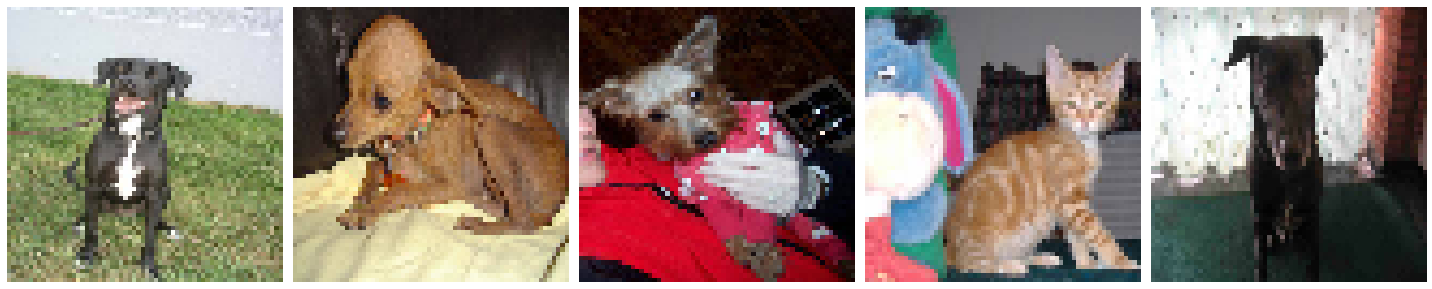

In [48]:
plotImages(sample_training_images[:50])

In [49]:
from keras import layers, models
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, ZeroPadding2D
from keras.models import Model

import keras.backend as K
from keras.models import Sequential

# Here we make the CNN model!

In [19]:
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(64, (3,3), activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(64, (3,3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(2, activation='softmax'))

#model = Sequential([
#    Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
#    MaxPooling2D(),
#    Conv2D(32, 3, padding='same', activation='relu'),
#    MaxPooling2D(),
#    Conv2D(64, 3, padding='same', activation='relu'),
#    MaxPooling2D(),
#    Flatten(),
#    Dense(512, activation='relu'),
#    Dense(1) #why is it 1 and not 2 since 2 classes?
#])

#model = Sequential([
#    Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
#    MaxPooling2D((2,2)),
#    Conv2D(32, (3,3), padding='same', activation='relu'),
#    MaxPooling2D((2,2)),
#    Conv2D(64, (3,3), padding='same', activation='relu'),
#    MaxPooling2D(2,2),
#    Flatten(),
#    Dense(512, activation='relu'),
#    Dense(1) #why is it 1 and not 2 since 2 classes?
#])

#model.summary()
#model = Sequential()

#model.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (50, 50, 3)))

#model.add(BatchNormalization(axis = 3, name = 'bn0'))
#model.add(Activation('relu'))

#model.add(MaxPooling2D((2, 2), name='max_pool'))
#model.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
#model.add(Activation('relu'))
#model.add(AveragePooling2D((3, 3), name='avg_pool'))

#model.add(Flatten())
#model.add(Dense(500, activation="relu", name='rl'))
#model.add(Dropout(0.8))
#model.add(Dense(2, activation='softmax', name='sm'))

#model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
#model.summary()

model=Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,360,449
Trainable params: 2,360,449
Non-trainable params: 0
____________________________________________

# Training the CNN. It's just put into history so can do visualizations etc afterwards

In [20]:
#history = model.fit_generator(
#    train_data_gen,
#    steps_per_epoch=total_train // batch_size,
 #   epochs=epochs,
#    validation_data=val_data_gen,
#   validation_steps=total_val // batch_size
#)

history = model.fit_generator(generator=train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size,
                    epochs=5)

Epoch 1/5
62/62 [==============================] - 84s 1s/step - loss: 0.6830 - accuracy: 0.5757 - val_loss: 0.6234 - val_accuracy: 0.6391
Epoch 2/5
62/62 [==============================] - 78s 1s/step - loss: 0.6048 - accuracy: 0.6761 - val_loss: 0.6439 - val_accuracy: 0.6602
Epoch 3/5
62/62 [==============================] - 76s 1s/step - loss: 0.5629 - accuracy: 0.7092 - val_loss: 0.5471 - val_accuracy: 0.7198
Epoch 4/5
62/62 [==============================] - 74s 1s/step - loss: 0.5149 - accuracy: 0.7480 - val_loss: 0.5853 - val_accuracy: 0.7293
Epoch 5/5
62/62 [==============================] - 72s 1s/step - loss: 0.5027 - accuracy: 0.7578 - val_loss: 0.6380 - val_accuracy: 0.7435


# Ok well it was 0.74 val_accuracy after 5 epochs. Now do some augmentations with ImageDataGenerator

In [21]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [22]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           seed=42,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 8005 images belonging to 2 classes.


In [23]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

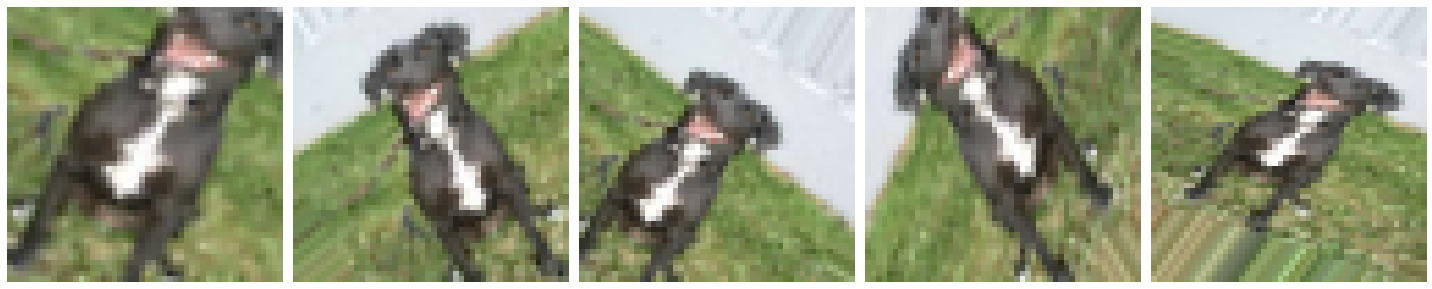

In [25]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Train the CNN with the augmented images. Actually got kinda worse! Maybe too many epochs? Or was it due to augmentation?

In [26]:
history = model.fit_generator(generator=train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size,
                    epochs=10)

Epoch 1/10
62/62 [==============================] - 81s 1s/step - loss: 0.6356 - accuracy: 0.6405 - val_loss: 0.5428 - val_accuracy: 0.7349
Epoch 2/10
62/62 [==============================] - 88s 1s/step - loss: 0.6203 - accuracy: 0.6510 - val_loss: 0.5266 - val_accuracy: 0.7309
Epoch 3/10
62/62 [==============================] - 88s 1s/step - loss: 0.6205 - accuracy: 0.6515 - val_loss: 0.5677 - val_accuracy: 0.6834
Epoch 4/10
62/62 [==============================] - 85s 1s/step - loss: 0.6164 - accuracy: 0.6571 - val_loss: 0.5763 - val_accuracy: 0.6945
Epoch 5/10
62/62 [==============================] - 82s 1s/step - loss: 0.6132 - accuracy: 0.6599 - val_loss: 0.5904 - val_accuracy: 0.7251
Epoch 6/10
62/62 [==============================] - 82s 1s/step - loss: 0.6009 - accuracy: 0.6698 - val_loss: 0.5255 - val_accuracy: 0.7224
Epoch 7/10
62/62 [==============================] - 79s 1s/step - loss: 0.6006 - accuracy: 0.6727 - val_loss: 0.5616 - val_accuracy: 0.7309
Epoch 8/10
62/62 [==

In [51]:
#Let me alter the model! This is the first one! Total train params at 2.4M ish
#model=Sequential()
#model.add(Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
#model.summary()

#another one which was very poor. Total trainable params at 500k ish
#model=Sequential()
#model.add(Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))
#model.add(Conv2D(32, (2, 2), activation = 'relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
#model.summary()

#Another model, with total trainable params at 187k ish. Result was 0.7055 w 10 epochs
#model = Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
#model.summary()

#repeating the above but with two dropouts instead of one. 187k trainable params. Result was 0.71 w 10 epochs. Attempt with 15 epochs 
#and we get 0.75

#model = Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(Dropout(0.5))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.5))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
#model.summary()

#do the model from the https://www.kaggle.com/sangwookchn/convolutional-neural-networks-cnn-keras notebook next! No dropouts 2.3M
#trainable params
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
#note is 2,2
#note this one had 64x64 not 50x50
model.add(MaxPooling2D(pool_size = (2,2)))
#rest is same as mine
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 30752)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               3936384   
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit_generator(generator=train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size,
                    epochs=15)

Epoch 1/15
62/62 [==============================] - 84s 1s/step - loss: 0.6131 - accuracy: 0.6586 - val_loss: 0.5359 - val_accuracy: 0.6990
Epoch 2/15
62/62 [==============================] - 99s 2s/step - loss: 0.6130 - accuracy: 0.6629 - val_loss: 0.5818 - val_accuracy: 0.6871
Epoch 3/15
62/62 [==============================] - 90s 1s/step - loss: 0.6137 - accuracy: 0.6636 - val_loss: 0.6076 - val_accuracy: 0.7050
Epoch 4/15
62/62 [==============================] - 88s 1s/step - loss: 0.6049 - accuracy: 0.6685 - val_loss: 0.5998 - val_accuracy: 0.7008
Epoch 5/15
62/62 [==============================] - 88s 1s/step - loss: 0.5986 - accuracy: 0.6765 - val_loss: 0.5678 - val_accuracy: 0.6654
Epoch 6/15
62/62 [==============================] - 86s 1s/step - loss: 0.5913 - accuracy: 0.6822 - val_loss: 0.6095 - val_accuracy: 0.7277
Epoch 7/15
62/62 [==============================] - 84s 1s/step - loss: 0.5913 - accuracy: 0.6803 - val_loss: 0.5582 - val_accuracy: 0.6834
Epoch 8/15
62/62 [==

Things to do:
1. Visualisations 
2. Alter image sizes 100x100 vs. 50x50 which is what we started with and got our best val_accuracy of 0.74 with 5 epochs
3. Different augmentations
4. Other drop outs 

Can check this one https://www.kaggle.com/sangwookchn/convolutional-neural-networks-cnn-keras which seems to have val_accuracy of 1.0 with input shape of 64x64, Convolution2D(32, 3, 3,), maxpooling 2x2, augmentations are ImageDataGenerator( 
shear_range = 0.2, 
zoom_range = 0.2, 
horizontal_flip = True). NB our input shape is 50x50

Which is vs. mine which are  rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


In [52]:
#let me alter augmentations then per the notebook I refer to above. Will alter the model later based on that notebook

image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    shear_range=0.2
                    #rotation_range=45,
                    #width_shift_range=.15,
                    #height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.2
                    #change from 0.5 to 0.2
                    )

In [53]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           seed=42,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 8005 images belonging to 2 classes.


In [54]:
history = model.fit_generator(generator=train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size,
                    epochs=15)

Epoch 1/15
62/62 [==============================] - 87s 1s/step - loss: 0.7961 - accuracy: 0.5680 - val_loss: 0.6234 - val_accuracy: 0.6438
Epoch 2/15
62/62 [==============================] - 94s 2s/step - loss: 0.6390 - accuracy: 0.6293 - val_loss: 0.6565 - val_accuracy: 0.6654
Epoch 3/15
62/62 [==============================] - 93s 2s/step - loss: 0.6269 - accuracy: 0.6415 - val_loss: 0.6220 - val_accuracy: 0.6464
Epoch 4/15
62/62 [==============================] - 92s 1s/step - loss: 0.6111 - accuracy: 0.6683 - val_loss: 0.5492 - val_accuracy: 0.6876
Epoch 5/15
62/62 [==============================] - 89s 1s/step - loss: 0.6178 - accuracy: 0.6450 - val_loss: 0.6061 - val_accuracy: 0.6185
Epoch 6/15
 2/62 [..............................] - ETA: 14s - loss: 0.6157 - accuracy: 0.6445

KeyboardInterrupt: 

In [ ]:
#ok let me change to 64x64 and try this again! Ok that's done and nowhere near 1.0 on val_accuracy after couple of epochs!